# Irish Dataset

# 1) Classification

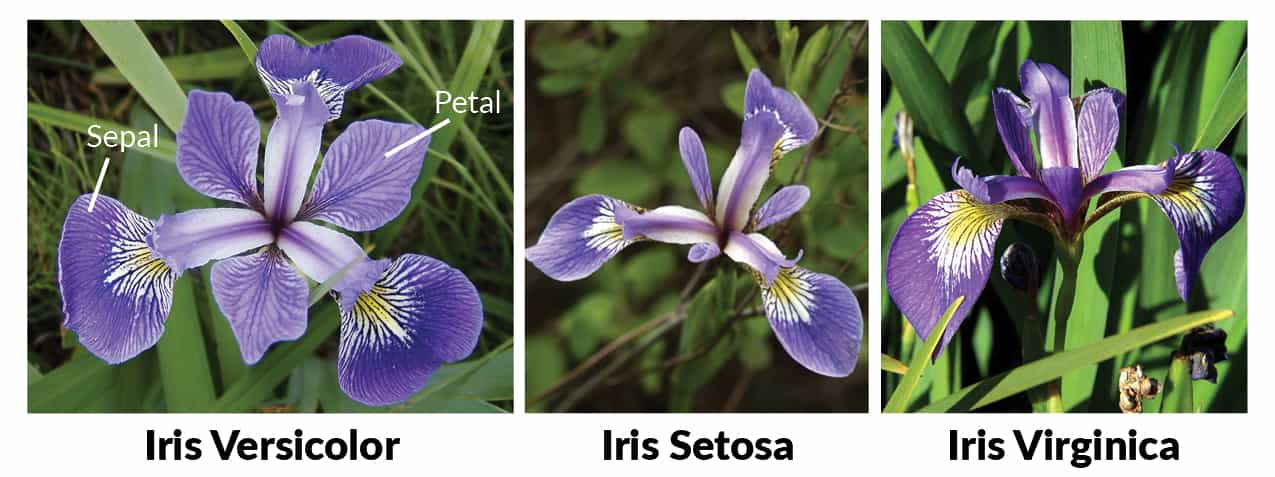

# load dataset

In [1]:
#import seaborn library เพื่อใช้ในการวาดภาพ
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset('iris') #อ่าน dataset ที่ชื่อ iris ซึ่งมีอยู่ใน seaborn library
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X_iris = iris.drop('species', axis=1) #ตัด feature ที่ชื่อ species ออก
y_iris = iris['species'] #กำหนดให้ feature ที่ชื่อ species เป็น target output

In [3]:
X_iris #แสดง input feature 150 rows × 4 columns

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X_iris.shape

(150, 4)

In [5]:
y_iris #แสดง output feature 150 rows × 1 column

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [6]:
y_iris.shape

(150,)

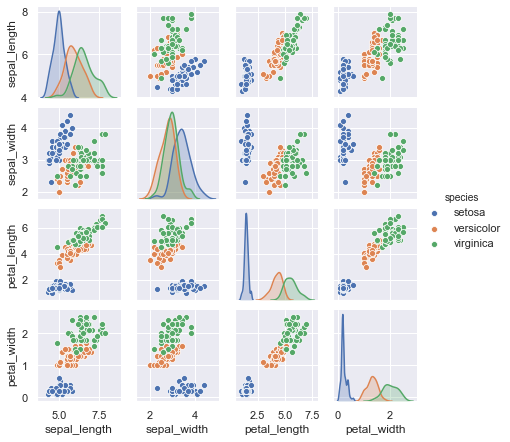

In [7]:
#seaborn.pairplot => Plot pairwise relationships in a dataset.
sns.pairplot(iris, hue='species', height=1.5);

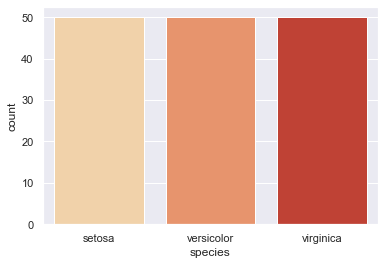

In [8]:
#Count Plot displays the number of observations for a categorical variable using bars.
sns.countplot(x='species',data=iris, palette="OrRd")

In [9]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
#Xtrain => training data
#Xtest => testing data
#ytrain => traing target data
#ytest => testing target data

# Choose Model

In [10]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class Gaussian Naive Bayes
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data using training data
y_model = model.predict(Xtest) # 4. predict on new data testing data

# Evaluate Model

In [11]:
from sklearn.metrics import accuracy_score #Accuracy classification score
accuracy_score(ytest, y_model) #comparing real target (ytest) with predicted target (y_model)

0.9736842105263158

In [12]:
# credit code: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix 

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

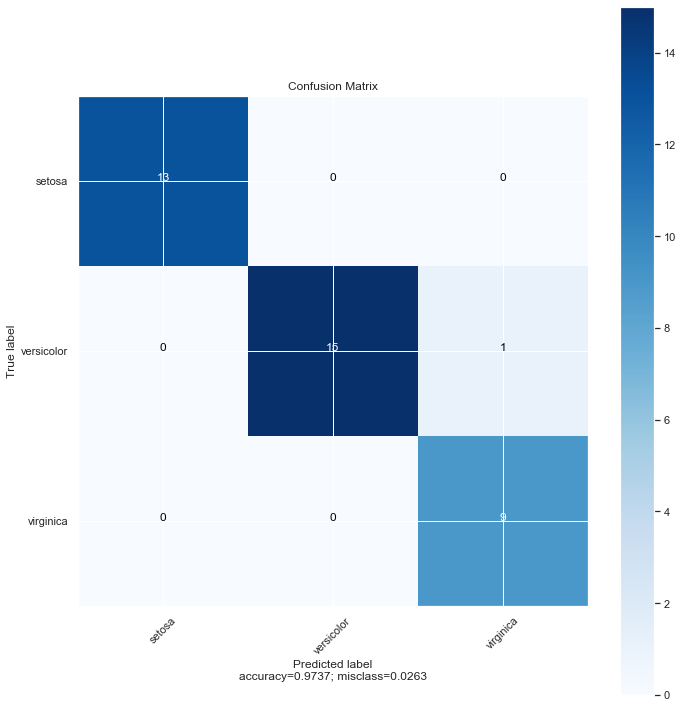

In [13]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(cm           = confusion_matrix(ytest, y_model), 
                      normalize    = False,
                      target_names = ['setosa', 'versicolor','virginica'],
                      title        = "Confusion Matrix")

# Saving and loading a model with pickle

In [14]:
import pickle

# Save an existing model to file
# wb = write binary
pickle.dump(model, open("model/iris_model.pkl", "wb"))

In [15]:
# Load a saved model
loaded_pickle_model = pickle.load(open("model/iris_model.pkl", "rb"))

In [16]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(Xtest)
pickle_y_preds

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

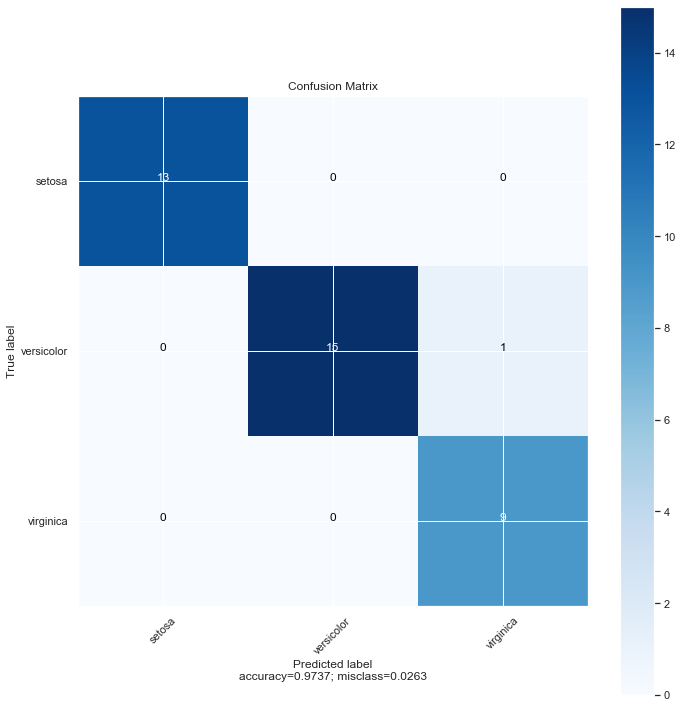

In [17]:
from sklearn.naive_bayes import GaussianNB
plot_confusion_matrix(cm           = confusion_matrix(ytest, pickle_y_preds), 
                      normalize    = False,
                      target_names = ['setosa', 'versicolor','virginica'],
                      title        = "Confusion Matrix")

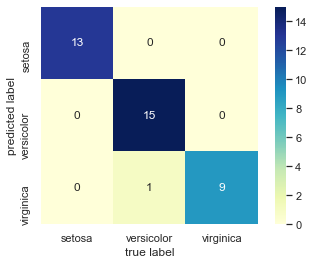

In [18]:
#using heatmap
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
mat = confusion_matrix(ytest, pickle_y_preds)
label = ['setosa', 'versicolor','virginica']
sns.heatmap(mat.T,square=True,annot=True,fmt='d', xticklabels=label, yticklabels=label,cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');

# 2) Irish Clustering

In [19]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate (2 dimenstions) the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

In [20]:
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
X_2D

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

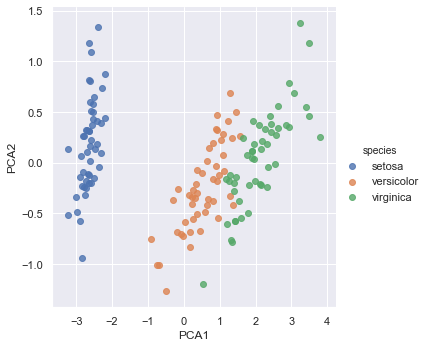

In [22]:
iris['PCA1'] = X_2D[:, 0] #ค่าข้อมูล dimension ที่ 1
iris['PCA2'] = X_2D[:, 1] #ค่าข้อมูล dimension ที่ 2
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [23]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class (Gaussian mixture model)
model = GaussianMixture(n_components=3, covariance_type='full') # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster label

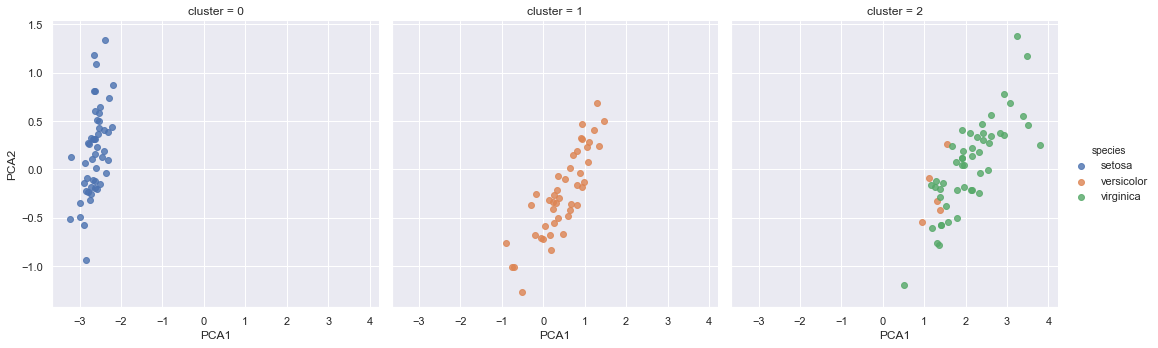

In [24]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster',fit_reg=False);
# input variables: PCA1, PCA2
# data : iris
# hue: วาดรูปตาม feature ที่ชื่อว่า species
# col: แสดงลำดับของ cluster
# fit_reg: ประมาณการ plot regression model